### Parallel Tempering Data Analysis
- load phi data for different X replicas
- calculate <phi_A * phi_B> for given X values
- plot
- find and plot heat capacity vs X (slope of <phiphi> vs X graph)
- discontinutiy (max) in heat capacity -> phase transition!

In [1]:
import numpy as np
np.seterr(divide='ignore')
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd
import wlcave as wlcave #need to path correctly!
import matplotlib.cm as cm
import sys


C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\getlimits.py:174: RuntimeWarning: divide by zero encountered in exp2
  eps=exp2(ld(-112)),
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\getlimits.py:53: RuntimeWarning: divide by zero encountered in log10
  self.precision = int(-log10(self.eps))
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\getlimits.py:54: RuntimeWarning: divide by zero encountered in power
  self.resolution = float_to_float(float_conv(10) ** (-self.precision))
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\getlimits.py:186: RuntimeWarning: divide by zero encountered in exp2
  epsneg_f80 = exp2(ld(-64))
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\getlimits.py:187: RuntimeWarning: divide by zero encountered in exp2
  tiny_f80 = exp2(ld(-16382))
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\getlimits.py:201: RuntimeWarning: divide by zero encountered in exp2
  eps=exp2(ld(-63)),
C:\Users\tmhab\anaconda3\lib\site-packages\nump

#### Basic test- X = 0, 12
4/6/21

In [2]:
phi_chi_0 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/phi8v1chi_0.txt"
phi_chi_0_df = pd.read_csv(phi_chi_0, delimiter = "   ")
#phi_chi_0_data = np.loadtxt(phi_chi_0)

phi_chi_12 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/phi8v2chi_12.txt"
phi_chi_12_df = pd.read_csv(phi_chi_12, delimiter = "   ")
#20x20x20 bins- should have 8000 pairs of phis

C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [3]:

sum_val = phi_chi_0_df["Vol_A"] + phi_chi_0_df["Vol_B"]
np.mean((sum_val-1)**2)

0.004591524999999947

In [4]:
phi_chi_12_df["Vol_A"] + phi_chi_12_df["Vol_B"]
# not equal to 1 due to kappa (need to increase)

0       1.14
1       0.95
2       0.90
3       0.95
4       1.02
        ... 
7995    1.15
7996    1.02
7997    1.07
7998    1.11
7999    0.90
Length: 8000, dtype: float64

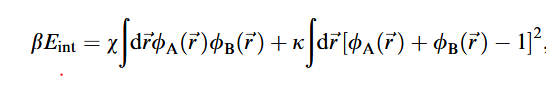

In [5]:
phiA_B_chi_0_product = phi_chi_0_df["Vol_A"] * phi_chi_0_df["Vol_B"]
phiA_B_chi_0 = phiA_B_chi_0_product.mean()

phiA_B_chi_12_product = phi_chi_12_df["Vol_A"] * phi_chi_12_df["Vol_B"]
phiA_B_chi_12 = phiA_B_chi_12_product.mean()


In [6]:
print(phiA_B_chi_0)
print(phiA_B_chi_12)

0.22901861249999975
0.0580838375000001


In [7]:
# make list of dataframes, for each frame in list calc product and mean, append to a list of <phi_Aphi_B> vals
chi_df_list = [phi_chi_0_df, phi_chi_12_df]
phiA_B_list = []
for df in chi_df_list:
    df_product = df["Vol_A"] * df["Vol_B"]
    phiA_B = df_product.mean()
    phiA_B_list.append(phiA_B)

print(phiA_B_list)

[0.22901861249999975, 0.0580838375000001]


#### Homogenous phase, X = 0 - 6, kappa = 10, monomer volume = 0.5
4/7/21

In [8]:
phi_chi_0 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.7.21_ABmelt_low_kappa_4hrs/phi8v1_chi_0.txt"
phi_chi_0_df = pd.read_csv(phi_chi_0, delimiter = "   ")
#phi_chi_0_data = np.loadtxt(phi_chi_0)

phi_chi_1 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.7.21_ABmelt_low_kappa_4hrs/phi8v2_chi_1.txt"
phi_chi_1_df = pd.read_csv(phi_chi_1, delimiter = "   ")

phi_chi_2 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.7.21_ABmelt_low_kappa_4hrs/phi8v3_chi_2.txt"
phi_chi_2_df = pd.read_csv(phi_chi_2, delimiter = "   ")

phi_chi_3 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.7.21_ABmelt_low_kappa_4hrs/phi8v4_chi_3.txt"
phi_chi_3_df = pd.read_csv(phi_chi_3, delimiter = "   ")

phi_chi_4 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.7.21_ABmelt_low_kappa_4hrs/phi8v5_chi_4.txt"
phi_chi_4_df = pd.read_csv(phi_chi_4, delimiter = "   ")

phi_chi_5 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.7.21_ABmelt_low_kappa_4hrs/phi8v6_chi_5.txt"
phi_chi_5_df = pd.read_csv(phi_chi_5, delimiter = "   ")

phi_chi_6 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.7.21_ABmelt_low_kappa_4hrs/phi8v7_chi_6.txt"
phi_chi_6_df = pd.read_csv(phi_chi_6, delimiter = "   ")

# phi_chi_12 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/phi8v2chi_12.txt"
# phi_chi_12_df = pd.read_csv(phi_chi_12, delimiter = "   ")
# #20x20x20 bins- should have 8000 pairs of phis

C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':
C:\Users\tmhab\anaconda3\lib\site-packages\i

[1.000005   0.99997125 0.9999175  0.999935   0.99988375 0.9999675
 0.9999625 ]
0.06860808017041072


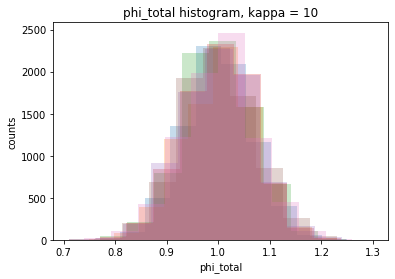

In [9]:
# vol frac = =1 analysis
chi_df_list = [phi_chi_0_df, phi_chi_1_df, phi_chi_2_df, phi_chi_3_df, phi_chi_4_df, phi_chi_5_df, phi_chi_6_df]

phiA_B_sum_list_seventh = np.array([])
phiA_B_std_list_seventh = np.array([])
for df in chi_df_list:
    df_product = df["Vol_A"] + df["Vol_B"]
    df_product.hist(alpha=0.25, grid=False)
    phiA_B_std_list_seventh = np.append(phiA_B_std_list_seventh, df_product.std(0))
    phiA_B_sum = df_product.mean()
    phiA_B_sum_list_seventh = np.append(phiA_B_sum_list_seventh, phiA_B_sum)

plt.title("phi_total histogram, kappa = 10")
plt.xlabel("phi_total")
plt.ylabel("counts")

print(phiA_B_sum_list_seventh)
print(phiA_B_std_list_seventh.mean())

In [10]:
print(phiA_B_std_list_seventh)

[0.06660334 0.06731068 0.06712214 0.06746918 0.06943271 0.07075079
 0.07156772]


In [11]:
phi_chi_0_df.std(0)

Vol_A    0.151249
Vol_B    0.151757
dtype: float64

In [12]:
# make list of dataframes, for each frame in list calc product and mean, append to a list of <phi_Aphi_B> vals
chi_df_list = [phi_chi_0_df, phi_chi_1_df, phi_chi_2_df, phi_chi_3_df, phi_chi_4_df, phi_chi_5_df, phi_chi_6_df]
phiA_B_list = []
for df in chi_df_list:
    df_product = df["Vol_A"] * df["Vol_B"]
    phiA_B = df_product.mean()
    phiA_B_list.append(phiA_B)

print(phiA_B_list)

[0.22926977499999948, 0.16098972500000067, 0.1107738125000006, 0.09053867500000048, 0.0794265375000003, 0.07310970000000058, 0.06879886250000036]


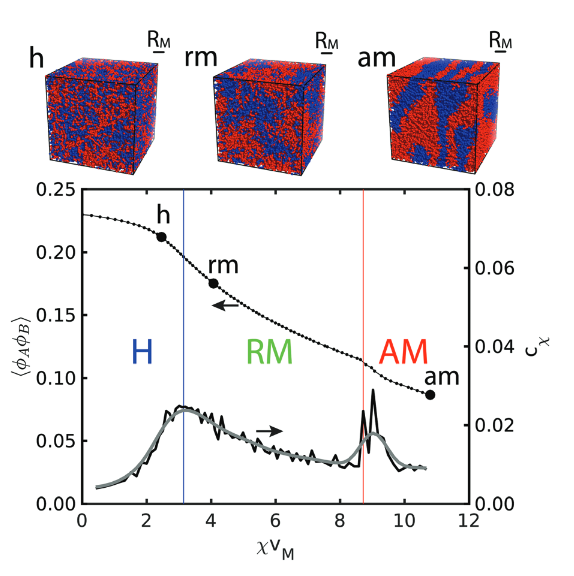

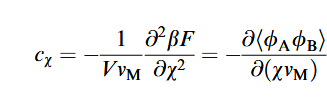

Text(0.5, 0, 'X*v_m')

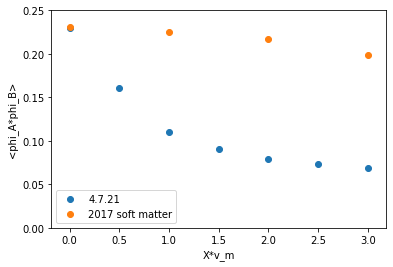

In [13]:
#nondimensionalize x axis
chi_vals = np.array([0, 1, 2, 3, 4, 5, 6])

bead_volume = 0.1 # simulation units
monomer_volume = 5 * bead_volume
chi_v_m = chi_vals*monomer_volume
phiA_B_list_sev = phiA_B_list
# my sim values
plt.scatter(chi_v_m, phiA_B_list, label = "4.7.21")
plt.ylim((0, .25))

# Estimating paper values
chi_v_m_paper = [0, 1, 2, 3]
phiA_B_paper = [0.231, 0.225, 0.217, 0.199 ] #imageJ
plt.scatter(chi_v_m_paper, phiA_B_paper, label = "2017 soft matter")

plt.legend()
plt.ylabel("<phi_A*phi_B>")
plt.xlabel("X*v_m")
# significant deviation from paper. kappa val/ lack of parallel tempering (too big of X interval)

#### Homogenous phase, X = 0 - 6 (dynamiclly changed to 0 - 3.6), kappa = 10, monomer volume = 0.5
4/9/21

In [14]:
phi_chi_0 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.9.21_ABmelt_100_kappa_17hrs/phi28v1_chi_0.txt"
phi_chi_0_df = pd.read_csv(phi_chi_0, delimiter = "   ")
#phi_chi_0_data = np.loadtxt(phi_chi_0)

phi_chi_1 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.9.21_ABmelt_100_kappa_17hrs/phi28v2_chi_1.txt"
phi_chi_1_df = pd.read_csv(phi_chi_1, delimiter = "   ")

phi_chi_2 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.9.21_ABmelt_100_kappa_17hrs/phi28v3_chi_2.txt"
phi_chi_2_df = pd.read_csv(phi_chi_2, delimiter = "   ")

phi_chi_3 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.9.21_ABmelt_100_kappa_17hrs/phi28v4_chi_3.txt"
phi_chi_3_df = pd.read_csv(phi_chi_3, delimiter = "   ")

phi_chi_4 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.9.21_ABmelt_100_kappa_17hrs/phi28v5_chi_4.txt"
phi_chi_4_df = pd.read_csv(phi_chi_4, delimiter = "   ")

phi_chi_5 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.9.21_ABmelt_100_kappa_17hrs/phi28v6_chi_5.txt"
phi_chi_5_df = pd.read_csv(phi_chi_5, delimiter = "   ")

phi_chi_6 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.9.21_ABmelt_100_kappa_17hrs/phi28v7_chi_6.txt"
phi_chi_6_df = pd.read_csv(phi_chi_6, delimiter = "   ")

# phi_chi_12 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/phi8v2chi_12.txt"
# phi_chi_12_df = pd.read_csv(phi_chi_12, delimiter = "   ")
# #20x20x20 bins- should have 8000 pairs of phis

C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':
C:\Users\tmhab\anaconda3\lib\site-packages\i

[1.00003125 0.99994    1.00004125 0.9998725  0.9998625  0.99997875
 0.99995375]
0.02256698418691306


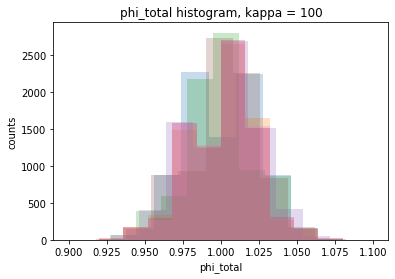

In [15]:
# tot vol frac =1 analysis
chi_df_list = [phi_chi_0_df, phi_chi_1_df, phi_chi_2_df, phi_chi_3_df, phi_chi_4_df, phi_chi_5_df, phi_chi_6_df]

phiA_B_sum_list_ninth = np.array([])
phiA_B_std_list_ninth = np.array([])
for df in chi_df_list:
    df_product = df["Vol_A"] + df["Vol_B"]
    df_product.hist(alpha=0.25, grid=False)
    phiA_B_std_list_ninth = np.append(phiA_B_std_list_ninth, df_product.std(0))
    phiA_B_sum = df_product.mean()
    phiA_B_sum_list_ninth = np.append(phiA_B_sum_list_ninth, phiA_B_sum)
    
plt.title("phi_total histogram, kappa = 100")
plt.xlabel("phi_total")
plt.ylabel("counts")

print(phiA_B_sum_list_ninth)
print(phiA_B_std_list_ninth.mean())


In [16]:
x = np.array([])
np.append(x, 1)

array([1.])

In [17]:

phiA_B_list = []
for df in chi_df_list:
    df_product = df["Vol_A"] * df["Vol_B"]
    phiA_B = df_product.mean()
    phiA_B_list.append(phiA_B)

print(phiA_B_list)
phiA_B_list_nine = phiA_B_list

[0.2282478999999978, 0.20246192499999818, 0.14845042500000083, 0.11977721250000166, 0.10277476250000121, 0.09123586250000099, 0.08454830000000087]


Text(0.5, 0, 'X*v_m')

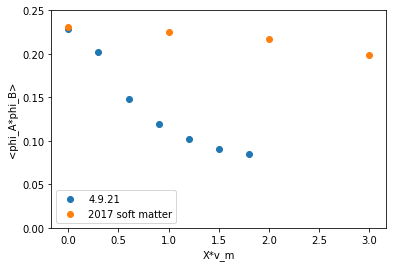

In [18]:
#nondimensionalize x axis
chi_vals = np.array([0, 0.6, 1.2, 1.8, 2.4, 3, 3.6])


bead_volume = 0.1 # simulation units
monomer_volume = 5 * bead_volume
chi_v_m = chi_vals*monomer_volume

# my sim values
plt.scatter(chi_v_m, phiA_B_list, label = "4.9.21")

plt.ylim((0, .25))

# Estimating paper values
chi_v_m_paper = [0, 1, 2, 3]
phiA_B_paper = [0.231, 0.225, 0.217, 0.199 ] #imageJ
plt.scatter(chi_v_m_paper, phiA_B_paper, label = "2017 soft matter")


plt.legend()
plt.ylabel("<phi_A*phi_B>")
plt.xlabel("X*v_m")
# significant deviation from paper. kappa val/ lack of parallel tempering (too big of X interval)

#### Homogenous phase, X = 0 - 3 (dynamiclly changed to 0 - 1.8), kappa = 10, monomer volume = 0.5
4/11/21

In [19]:
phi_chi_0 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.11.21_ABmelt_10_kappa_9hrs/phi18v1_chi_0.txt"
phi_chi_0_df = pd.read_csv(phi_chi_0, delimiter = "   ")
#phi_chi_0_data = np.loadtxt(phi_chi_0)

phi_chi_0p5 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.11.21_ABmelt_10_kappa_9hrs/phi18v2_chi_0.5.txt"
phi_chi_0p5_df = pd.read_csv(phi_chi_0p5, delimiter = "   ")

phi_chi_1 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.11.21_ABmelt_10_kappa_9hrs/phi18v3_chi_1.txt"
phi_chi_1_df = pd.read_csv(phi_chi_1, delimiter = "   ")

phi_chi_1p5 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.11.21_ABmelt_10_kappa_9hrs/phi18v4_chi_1.5.txt"
phi_chi_1p5_df = pd.read_csv(phi_chi_1p5, delimiter = "   ")

phi_chi_2 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.11.21_ABmelt_10_kappa_9hrs/phi18v5_chi_2.txt"
phi_chi_2_df = pd.read_csv(phi_chi_2, delimiter = "   ")

phi_chi_2p5 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.11.21_ABmelt_10_kappa_9hrs/phi18v6_chi_2.5.txt"
phi_chi_2p5_df = pd.read_csv(phi_chi_2p5, delimiter = "   ")

phi_chi_3 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.11.21_ABmelt_10_kappa_9hrs/phi18v7_chi_3.txt"
phi_chi_3_df = pd.read_csv(phi_chi_3, delimiter = "   ")

# phi_chi_12 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/phi8v2chi_12.txt"
# phi_chi_12_df = pd.read_csv(phi_chi_12, delimiter = "   ")
# #20x20x20 bins- should have 8000 pairs of phis

C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':
C:\Users\tmhab\anaconda3\lib\site-packages\i

In [20]:
# make list of dataframes, for each frame in list calc product and mean, append to a list of <phi_Aphi_B> vals
chi_df_list = [phi_chi_0_df, phi_chi_0p5_df, phi_chi_1_df, phi_chi_1p5_df, phi_chi_2_df, phi_chi_2p5_df, phi_chi_3_df]
phiA_B_list = []
for df in chi_df_list:
    df_product = df["Vol_A"] * df["Vol_B"]
    phiA_B = df_product.mean()
    phiA_B_list.append(phiA_B)

print(phiA_B_list)
phiA_B_list_elev = phiA_B_list

[0.2291005374999988, 0.22120911250000036, 0.20105572500000007, 0.1725483874999995, 0.15006424999999998, 0.13473852500000053, 0.12114483750000098]


Text(0.5, 0, 'X*v_m')

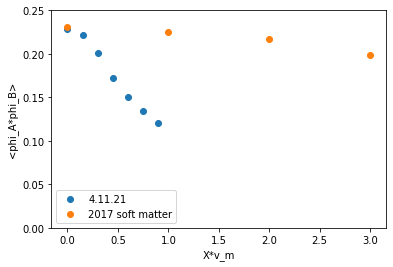

In [21]:
#nondimensionalize x axis
chi_vals = np.array([0, 0.3, 0.6, 0.9, 1.2, 1.5, 1.8])


bead_volume = 0.1 # simulation units
monomer_volume = 5 * bead_volume
chi_v_m = chi_vals*monomer_volume

# my sim values
plt.scatter(chi_v_m, phiA_B_list, label = "4.11.21")

plt.ylim((0, .25))

# Estimating paper values
chi_v_m_paper = [0, 1, 2, 3]
phiA_B_paper = [0.231, 0.225, 0.217, 0.199 ] #imageJ
plt.scatter(chi_v_m_paper, phiA_B_paper, label = "2017 soft matter")


plt.legend()
plt.ylabel("<phi_A*phi_B>")
plt.xlabel("X*v_m")
# significant deviation from paper. kappa val/ lack of parallel tempering (too big of X interval)

#### Homogenous phase, X = 0 - 3, kappa = 10, monomer volume = 0.5, reptation on (therefore no PT)
4/14/21

Why reptation on mean no PT: wlcsim has a second chi energy, chi L2, which is somehow involved in modeling Maier Saupe theory. When this parameter is turned on, reptation is not able to occur (wlc_sim crashes). But, when this parameter is set to never turn on, parallel tempering does not occur (I think because we are techincally tempering over both chis). Currently cnat have both running)

In [22]:
phi_chi_0 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.14.21_ABmelt_10_kappa_reptation_12hrs/phi18v1_chi_0.txt"
phi_chi_0_df = pd.read_csv(phi_chi_0, delimiter = "   ")
#phi_chi_0_data = np.loadtxt(phi_chi_0)

phi_chi_0p5 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.14.21_ABmelt_10_kappa_reptation_12hrs/phi18v2_chi_0.5.txt"
phi_chi_0p5_df = pd.read_csv(phi_chi_0p5, delimiter = "   ")

phi_chi_1 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.14.21_ABmelt_10_kappa_reptation_12hrs/phi18v3_chi_1.txt"
phi_chi_1_df = pd.read_csv(phi_chi_1, delimiter = "   ")

phi_chi_1p5 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.14.21_ABmelt_10_kappa_reptation_12hrs/phi18v4_chi_1.5.txt"
phi_chi_1p5_df = pd.read_csv(phi_chi_1p5, delimiter = "   ")

phi_chi_2 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.14.21_ABmelt_10_kappa_reptation_12hrs/phi18v5_chi_2.txt"
phi_chi_2_df = pd.read_csv(phi_chi_2, delimiter = "   ")

phi_chi_2p5 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.14.21_ABmelt_10_kappa_reptation_12hrs/phi18v6_chi_2.5.txt"
phi_chi_2p5_df = pd.read_csv(phi_chi_2p5, delimiter = "   ")

phi_chi_3 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.14.21_ABmelt_10_kappa_reptation_12hrs/phi18v7_chi_3.txt"
phi_chi_3_df = pd.read_csv(phi_chi_3, delimiter = "   ")

# phi_chi_12 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/phi8v2chi_12.txt"
# phi_chi_12_df = pd.read_csv(phi_chi_12, delimiter = "   ")
# #20x20x20 bins- should have 8000 pairs of phis

C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':
C:\Users\tmhab\anaconda3\lib\site-packages\i

In [23]:
# make list of dataframes, for each frame in list calc product and mean, append to a list of <phi_Aphi_B> vals
chi_df_list = [phi_chi_0_df, phi_chi_0p5_df, phi_chi_1_df, phi_chi_1p5_df, phi_chi_2_df, phi_chi_2p5_df, phi_chi_3_df]
phiA_B_list = []
for df in chi_df_list:
    df_product = df["Vol_A"] * df["Vol_B"]
    phiA_B = df_product.mean()
    phiA_B_list.append(phiA_B)

print(phiA_B_list)
phiA_B_list_fort = phiA_B_list

[0.2287704124999991, 0.21311234999999962, 0.16395199999999963, 0.13159482500000125, 0.11194630000000078, 0.09900153750000074, 0.09088736250000075]


Text(0.5, 0, 'X*v_m')

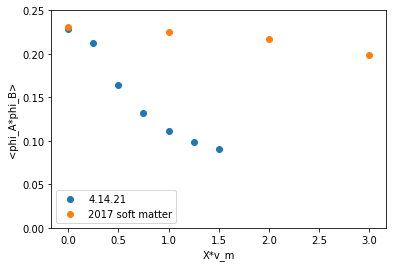

In [24]:
#nondimensionalize x axis
chi_vals = np.array([0, 0.5, 1, 1.5, 2, 2.5, 3])


bead_volume = 0.1 # simulation units
monomer_volume = 5 * bead_volume
chi_v_m = chi_vals*monomer_volume

# my sim values
plt.scatter(chi_v_m, phiA_B_list, label = "4.14.21")

plt.ylim((0, .25))

# Estimating paper values
chi_v_m_paper = [0, 1, 2, 3]
phiA_B_paper = [0.231, 0.225, 0.217, 0.199 ] #imageJ
plt.scatter(chi_v_m_paper, phiA_B_paper, label = "2017 soft matter")


plt.legend()
plt.ylabel("<phi_A*phi_B>")
plt.xlabel("X*v_m")
# significant deviation from paper. kappa val/ lack of parallel tempering (too big of X interval)

#### Homogenous phase, X = 0 - 1, kappa = 20, monomer volume = 0.5, reptation on (therefore no PT)
4/17/21

In [25]:
phi_chi_0 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.18.21_ABmelt_20_kappa_reptation_17hrs/phi39v1_chi_0.txt"
phi_chi_0_df = pd.read_csv(phi_chi_0, delimiter = "   ")
#phi_chi_0_data = np.loadtxt(phi_chi_0)

phi_chi_0p11 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.18.21_ABmelt_20_kappa_reptation_17hrs/phi39v2_chi_0.11.txt"
phi_chi_0p11_df = pd.read_csv(phi_chi_0p11, delimiter = "   ")

phi_chi_0p22 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.18.21_ABmelt_20_kappa_reptation_17hrs/phi39v3_chi_0.22.txt"
phi_chi_0p22_df = pd.read_csv(phi_chi_0p22, delimiter = "   ")

phi_chi_0p33 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.18.21_ABmelt_20_kappa_reptation_17hrs/phi39v4_chi_0.33.txt"
phi_chi_0p33_df = pd.read_csv(phi_chi_0p33, delimiter = "   ")

phi_chi_0p44 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.18.21_ABmelt_20_kappa_reptation_17hrs/phi39v5_chi_0.44.txt"
phi_chi_0p44_df = pd.read_csv(phi_chi_0p44, delimiter = "   ")

phi_chi_0p55 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.18.21_ABmelt_20_kappa_reptation_17hrs/phi39v6_chi_0.55.txt"
phi_chi_0p55_df = pd.read_csv(phi_chi_0p55, delimiter = "   ")

phi_chi_0p66 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.18.21_ABmelt_20_kappa_reptation_17hrs/phi39v7_chi_0.66.txt"
phi_chi_0p66_df = pd.read_csv(phi_chi_0p66, delimiter = "   ")

phi_chi_0p77 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.18.21_ABmelt_20_kappa_reptation_17hrs/phi39v8_chi_0.77.txt"
phi_chi_0p77_df = pd.read_csv(phi_chi_0p77, delimiter = "   ")

phi_chi_0p88 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.18.21_ABmelt_20_kappa_reptation_17hrs/phi39v9_chi_0.88.txt"
phi_chi_0p88_df = pd.read_csv(phi_chi_0p88, delimiter = "   ")

phi_chi_1 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.18.21_ABmelt_20_kappa_reptation_17hrs/phi39v10_chi_1.00.txt"
phi_chi_1_df = pd.read_csv(phi_chi_1, delimiter = "   ")

# phi_chi_12 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/phi8v2chi_12.txt"
# phi_chi_12_df = pd.read_csv(phi_chi_12, delimiter = "   ")
# #20x20x20 bins- should have 8000 pairs of phis

C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':
C:\Users\tmhab\anaconda3\lib\site-packages\i

In [26]:
# make list of dataframes, for each frame in list calc product and mean, append to a list of <phi_Aphi_B> vals
chi_df_list = [phi_chi_0_df, phi_chi_0p11_df, phi_chi_0p22_df, phi_chi_0p33_df, phi_chi_0p44_df, phi_chi_0p55_df, phi_chi_0p66_df, phi_chi_0p77_df, phi_chi_0p88_df, phi_chi_1_df]
phiA_B_list = []
for df in chi_df_list:
    df_product = df["Vol_A"] * df["Vol_B"]
    phiA_B = df_product.mean()
    phiA_B_list.append(phiA_B)

print(phiA_B_list)
phiA_B_list_sevnt = phiA_B_list

[0.2279696875000001, 0.22649074999999874, 0.22491829999999927, 0.219767725, 0.2155038749999987, 0.20618409999999948, 0.1967791124999994, 0.18515323750000015, 0.17494875000000054, 0.1658480499999992]


Text(0.5, 0, 'X*v_m')

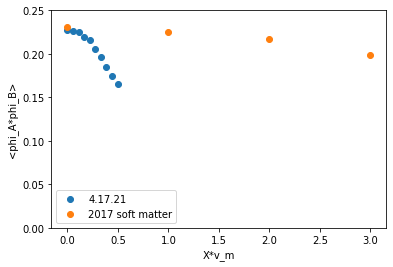

In [27]:
#nondimensionalize x axis
chi_vals = np.array([0, 0.11, 0.22, 0.33, 0.44, 0.55, 0.66, 0.77, 0.88, 1])


bead_volume = 0.1 # simulation units
monomer_volume = 5 * bead_volume
chi_v_m = chi_vals*monomer_volume

# my sim values
plt.scatter(chi_v_m, phiA_B_list, label = "4.17.21")

plt.ylim((0, .25))

# Estimating paper values
chi_v_m_paper = [0, 1, 2, 3]
phiA_B_paper = [0.231, 0.225, 0.217, 0.199 ] #imageJ
plt.scatter(chi_v_m_paper, phiA_B_paper, label = "2017 soft matter")


plt.legend()
plt.ylabel("<phi_A*phi_B>")
plt.xlabel("X*v_m")
# significant deviation from paper. kappa val/ lack of parallel tempering (too big of X interval)

### plotting all results (failed PTs)

Text(0.5, 0, 'X*v_m')

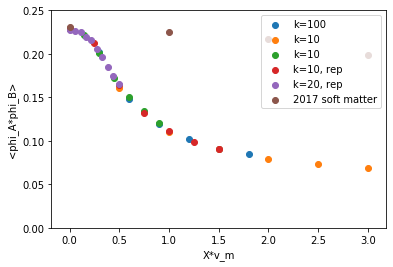

In [28]:
#nondimensionalize x axis
chi_vals_nine = np.array([0, 0.6, 1.2, 1.8, 2.4, 3, 3.6]) #dynamic change!!
chi_vals_sev = np.array([0, 1, 2, 3, 4, 5, 6])
chi_vals_elev = np.array([0, 0.3, 0.6, 0.9, 1.2, 1.5, 1.8]) #dynamic change!!
chi_vals_fort = np.array([0, 0.5, 1, 1.5, 2, 2.5, 3])
chi_vals_sevnt = np.array([0, 0.11, 0.22, 0.33, 0.44, 0.55, 0.66, 0.77, 0.88, 1])

bead_volume = 0.1 # simulation units
monomer_volume = 5 * bead_volume
chi_v_m_nine = chi_vals_nine *monomer_volume
chi_v_m_sev = chi_vals_sev * monomer_volume
chi_v_m_elev = chi_vals_elev * monomer_volume
chi_v_m_fort = chi_vals_fort * monomer_volume
chi_v_m_sevnt = chi_vals_sevnt * monomer_volume

# my sim values
plt.scatter(chi_v_m_nine, phiA_B_list_nine, label = "k=100")#"4.9.21")
plt.scatter(chi_v_m_sev, phiA_B_list_sev, label = "k=10")
plt.scatter(chi_v_m_elev, phiA_B_list_elev, label = "k=10")
plt.scatter(chi_v_m_fort, phiA_B_list_fort, label = "k=10, rep")
plt.scatter(chi_v_m_sevnt, phiA_B_list_sevnt, label = "k=20, rep")
plt.ylim((0, .25))

# Estimating paper values
chi_v_m_paper = [0, 1, 2, 3]
phiA_B_paper = [0.231, 0.225, 0.217, 0.199 ] #imageJ
plt.scatter(chi_v_m_paper, phiA_B_paper, label = "2017 soft matter")


plt.legend()
plt.ylabel("<phi_A*phi_B>")
plt.xlabel("X*v_m")
# significant deviation fr

#### Impact of kappa

Text(0.5, 0, 'X*v_m')

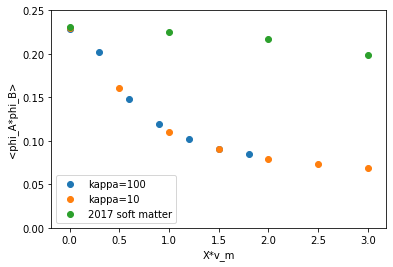

In [90]:
#nondimensionalize x axis
chi_vals_nine = np.array([0, 0.6, 1.2, 1.8, 2.4, 3, 3.6]) #dynamic change!!
chi_vals_sev = np.array([0, 1, 2, 3, 4, 5, 6])

bead_volume = 0.1 # simulation units
monomer_volume = 5 * bead_volume
chi_v_m_nine = chi_vals_nine *monomer_volume
chi_v_m_sev = chi_vals_sev * monomer_volume
# my sim values
plt.scatter(chi_v_m_nine, phiA_B_list_nine, label = "kappa=100")#"4.9.21")
plt.scatter(chi_v_m_sev, phiA_B_list_sev, label = "kappa=10")
plt.ylim((0, .25))

# Estimating paper values
chi_v_m_paper = [0, 1, 2, 3]
phiA_B_paper = [0.231, 0.225, 0.217, 0.199 ] #imageJ
plt.scatter(chi_v_m_paper, phiA_B_paper, label = "2017 soft matter")


plt.legend()
plt.ylabel("<phi_A*phi_B>")
plt.xlabel("X*v_m")
# significant deviation from paper. kappa val/ lack of parallel tempering (too big of X interval)

Text(0.5, 0, 'X*v_m')

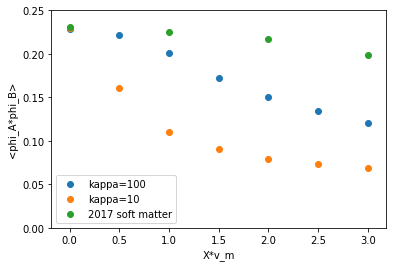

In [91]:
chi_vals = np.array([0, 1, 2, 3, 4, 5, 6])

bead_volume = 0.1 # simulation units
monomer_volume = 5 * bead_volume
chi_v_m = chi_vals*monomer_volume
# my sim values
plt.scatter(chi_v_m, phiA_B_list, label = "kappa=100")#"4.9.21")
plt.scatter(chi_v_m, phiA_B_list_sev, label = "kappa=10")
plt.ylim((0, .25))

# Estimating paper values
chi_v_m_paper = [0, 1, 2, 3]
phiA_B_paper = [0.231, 0.225, 0.217, 0.199 ] #imageJ
plt.scatter(chi_v_m_paper, phiA_B_paper, label = "2017 soft matter")


plt.legend()
plt.ylabel("<phi_A*phi_B>")
plt.xlabel("X*v_m")

Text(0.5, 0, 'X*v_m')

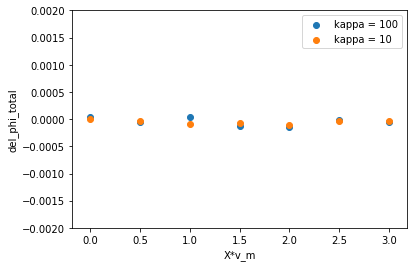

In [92]:
# mean phi total deviation from 1
#nondimensionalize x axis
chi_vals = np.array([0, 1, 2, 3, 4, 5, 6])

bead_volume = 0.1 # simulation units
monomer_volume = 5 * bead_volume
chi_v_m = chi_vals*monomer_volume

# my sim values
plt.scatter(chi_v_m, phiA_B_sum_list_ninth - 1, label = "kappa = 100")#, 4.9.21, no PT")
plt.scatter(chi_v_m, phiA_B_sum_list_seventh - 1, label = "kappa = 10")#, 4.7.21, no PT")

plt.ylim((-.002, .002))

plt.legend()
plt.ylabel("del_phi_total")
plt.xlabel("X*v_m")
# almost no differnece between differnet kappas for keeping vol fraction = 1-> but very dif distribution